# 1. Loading data and setting up tensorflow

In [3]:
!pip install tensorflow opencv-python matplotlib
# !pip install tensorflow-gpu

## 1.1 checking if the required dependencies have been installed

In [4]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy          

In [5]:
import tensorflow as tf
import os

In [6]:
## this code will show the presence of any usable gpus
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

2025-05-04 17:48:08.142186: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[]

**add gpu code if any over here**

## 1.2 removing bad images

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/tmp/ipykernel_31796/3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
## this code just assigns variables to make the code more readable
data_directory = 'data'
data_categories = os.listdir(data_directory)
image_extensions = ['png', 'jpg', 'jpeg', 'bmp']
data_categories

['sad', 'happy']

**this code lists all the files inside the directory :** 
`os.listdir(os.path.join(data_directory, data_categories[0]))`

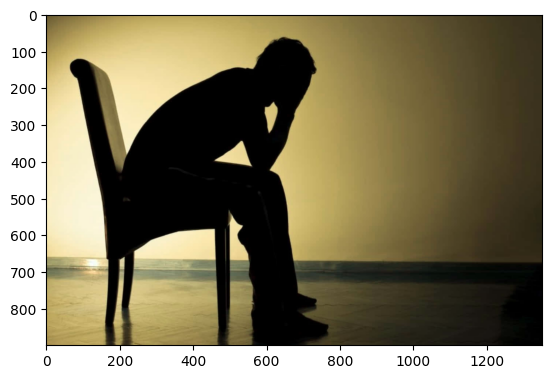

In [9]:
img = cv2.imread(os.path.join(data_directory, data_categories[0], 'alone-sad-pictures-1351-x-900-rnu5n35710aytlpc.jpg'))
img.shape
plt.imshow(img)

In [10]:
for image_class in data_categories :
    for image in os.listdir(os.path.join(data_directory, image_class)) :
        image_path = os.path.join(data_directory, image_class, image)
        try :
            img = cv2.imread(image_path) # creates a numpy array
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e :
            print('issue with image {}'.format(image_path))

[ WARN:0@40.444] global grfmt_png.cpp:695 read_chunk chunk data is too large
libpng warning: iCCP: known incorrect sRGB profile


## 1.3 loading the data into a dataset

# 2. Pre-process Data

## 2.1 scale data

In [11]:
## tf.data.Dataset??

In [12]:
import numpy as np

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()

Found 269 files belonging to 2 classes.


In [14]:
batch = data_iterator.next()
# batch[0].shape
# batch[1]
len(batch)

2025-05-04 17:48:15.154690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


2

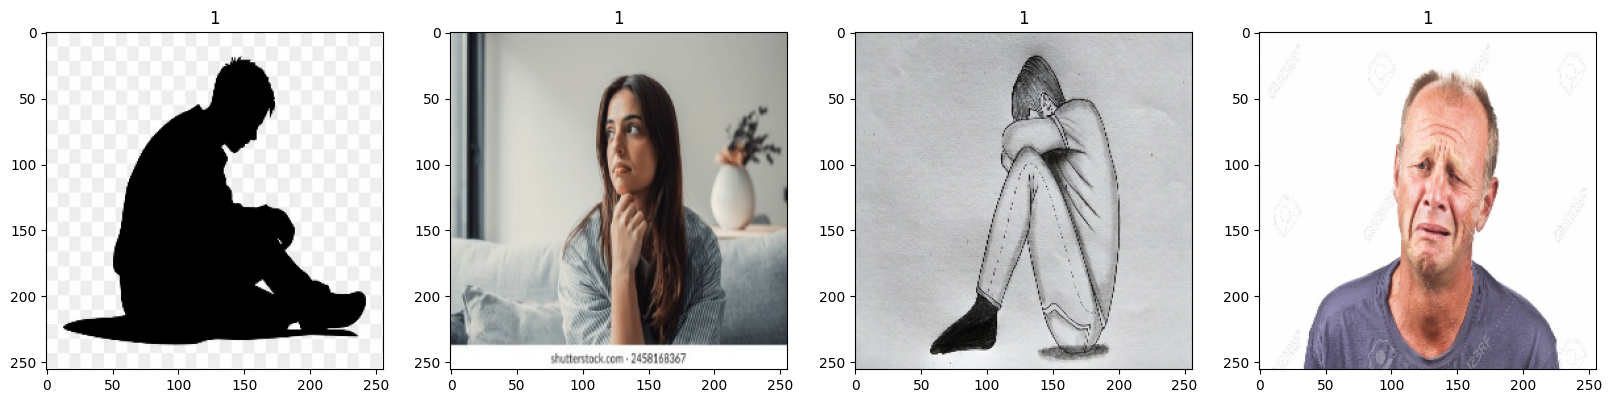

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x, y: (x/255, y))

In [17]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

2025-05-04 17:48:17.557664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


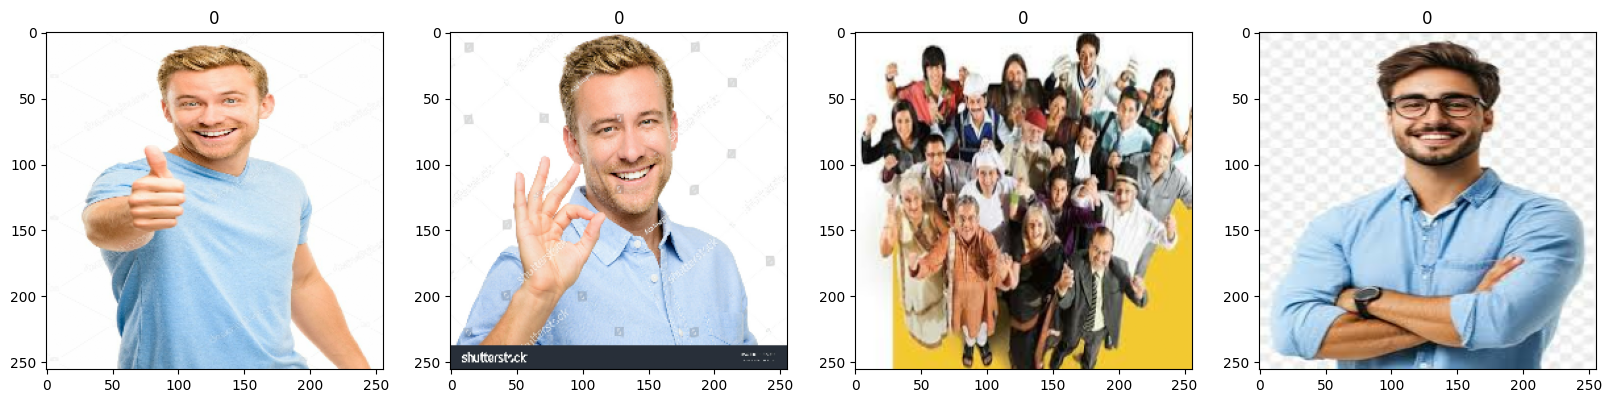

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 split data

In [19]:
batch_size = len(data)
batch_size

9

In [20]:
train_size = int(len(data)*.7) # train the model
val_size = int(len(data)*.2)+1 # evaluate the model
test_size = int(len(data)*.1)+1 # test the model

In [21]:
train_size + val_size + test_size
batch[0].shape

(32, 256, 256, 3)

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. The Deep Learning Model

## 3.1 Build the model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/home/nepenthe/Projects/Janus/Janus-ImageSorter/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 train the model

In [28]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-05-04 17:48:20.970811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.5013 - loss: 0.9159

2025-05-04 17:48:26.212650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4981 - loss: 0.9133 - val_accuracy: 0.5625 - val_loss: 0.6754
Epoch 2/20


2025-05-04 17:48:27.695273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.6198 - loss: 0.6699

2025-05-04 17:48:33.011755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 945ms/step - accuracy: 0.6213 - loss: 0.6690 - val_accuracy: 0.5938 - val_loss: 0.6141
Epoch 3/20


2025-05-04 17:48:34.246700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.7025 - loss: 0.6116

2025-05-04 17:48:38.831132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 916ms/step - accuracy: 0.6967 - loss: 0.6139 - val_accuracy: 0.6562 - val_loss: 0.5771
Epoch 4/20


2025-05-04 17:48:39.853987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.6381 - loss: 0.5865

2025-05-04 17:48:44.393697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 879ms/step - accuracy: 0.6429 - loss: 0.5838 - val_accuracy: 0.8594 - val_loss: 0.5326
Epoch 5/20


2025-05-04 17:48:45.733083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.8137 - loss: 0.5296

2025-05-04 17:48:50.512744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 920ms/step - accuracy: 0.8150 - loss: 0.5288 - val_accuracy: 0.7344 - val_loss: 0.4761
Epoch 6/20


2025-05-04 17:48:52.261955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.7905 - loss: 0.4720

2025-05-04 17:48:56.154160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 894ms/step - accuracy: 0.7944 - loss: 0.4708 - val_accuracy: 0.8594 - val_loss: 0.3932
Epoch 7/20


2025-05-04 17:48:57.821379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.8884 - loss: 0.3684

2025-05-04 17:49:02.107336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 878ms/step - accuracy: 0.8879 - loss: 0.3650 - val_accuracy: 0.8906 - val_loss: 0.3154
Epoch 8/20


2025-05-04 17:49:03.469379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.9209 - loss: 0.2990

2025-05-04 17:49:08.197820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 900ms/step - accuracy: 0.9196 - loss: 0.2972 - val_accuracy: 0.8594 - val_loss: 0.2855
Epoch 9/20


2025-05-04 17:49:09.286959: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.9190 - loss: 0.2235

2025-05-04 17:49:13.935826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 903ms/step - accuracy: 0.9187 - loss: 0.2221 - val_accuracy: 0.9688 - val_loss: 0.1711
Epoch 10/20


2025-05-04 17:49:15.449769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.9535 - loss: 0.1799

2025-05-04 17:49:19.602081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 863ms/step - accuracy: 0.9534 - loss: 0.1779 - val_accuracy: 0.9531 - val_loss: 0.1492
Epoch 11/20


2025-05-04 17:49:20.695292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.9694 - loss: 0.1261

2025-05-04 17:49:25.315171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 858ms/step - accuracy: 0.9700 - loss: 0.1227 - val_accuracy: 0.9375 - val_loss: 0.1342
Epoch 12/20


2025-05-04 17:49:26.463148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.9504 - loss: 0.1075

2025-05-04 17:49:30.712860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 841ms/step - accuracy: 0.9516 - loss: 0.1065 - val_accuracy: 0.9688 - val_loss: 0.0945
Epoch 13/20


2025-05-04 17:49:31.879033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.9736 - loss: 0.0848

2025-05-04 17:49:36.315403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 858ms/step - accuracy: 0.9751 - loss: 0.0822 - val_accuracy: 0.9844 - val_loss: 0.0588
Epoch 14/20


2025-05-04 17:49:37.876226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.9916 - loss: 0.0445

2025-05-04 17:49:41.797080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 840ms/step - accuracy: 0.9913 - loss: 0.0447 - val_accuracy: 0.9844 - val_loss: 0.0378
Epoch 15/20


2025-05-04 17:49:43.075642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.9872 - loss: 0.0561

2025-05-04 17:49:47.611859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 877ms/step - accuracy: 0.9883 - loss: 0.0543 - val_accuracy: 1.0000 - val_loss: 0.0409
Epoch 16/20


2025-05-04 17:49:48.600210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9981 - loss: 0.0280

2025-05-04 17:49:53.608785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 905ms/step - accuracy: 0.9976 - loss: 0.0285 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 17/20


2025-05-04 17:49:54.992629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 1.0000 - loss: 0.0100

2025-05-04 17:49:59.650285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 926ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 18/20


2025-05-04 17:50:01.267830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 1.0000 - loss: 0.0098

2025-05-04 17:50:05.338807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 897ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 19/20


2025-05-04 17:50:06.617000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 1.0000 - loss: 0.0147

2025-05-04 17:50:11.015871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 874ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 20/20


2025-05-04 17:50:12.396133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 1.0000 - loss: 0.0074

2025-05-04 17:50:16.390573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 835ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0120


In [29]:
hist.history

{'accuracy': [0.4791666567325592,
  0.6302083134651184,
  0.6614583134651184,
  0.671875,
  0.8229166865348816,
  0.8177083134651184,
  0.8854166865348816,
  0.9114583134651184,
  0.9166666865348816,
  0.953125,
  0.9739583134651184,
  0.9583333134651184,
  0.984375,
  0.9895833134651184,
  0.9947916865348816,
  0.9947916865348816,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.8974041938781738,
  0.663289487361908,
  0.6277472376823425,
  0.5675651431083679,
  0.5240740776062012,
  0.4636032283306122,
  0.34454652667045593,
  0.28653204441070557,
  0.21364636719226837,
  0.1659267097711563,
  0.10263780504465103,
  0.1001351848244667,
  0.06630782037973404,
  0.046212729066610336,
  0.044040072709321976,
  0.03165358677506447,
  0.014769204892218113,
  0.010291890241205692,
  0.01861237734556198,
  0.007819630205631256],
 'val_accuracy': [0.5625,
  0.59375,
  0.65625,
  0.859375,
  0.734375,
  0.859375,
  0.890625,
  0.859375,
  0.96875,
  0.953125,
  0.9375,
  0.96875,
  0.984375,
  0.9843

## 3.3 plot the performance of the model

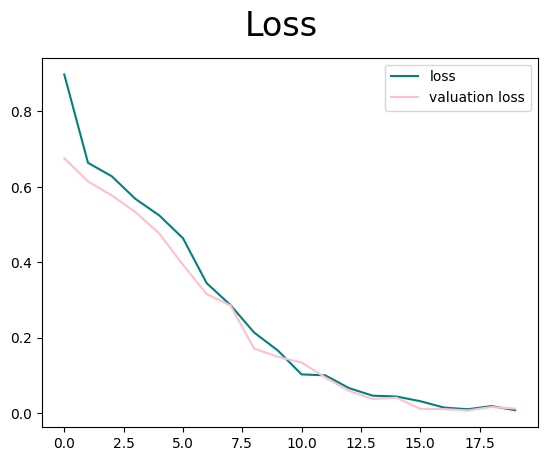

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='pink', label='valuation loss')
fig.suptitle('Loss', fontsize=24)
plt.legend(loc='upper right')
plt.show()

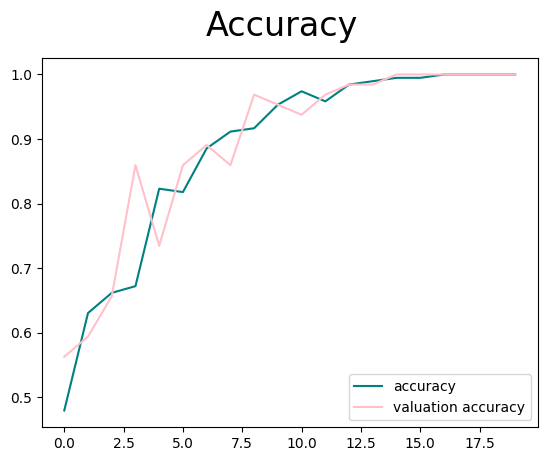

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='pink', label='valuation accuracy')
fig.suptitle('Accuracy', fontsize=24)
plt.legend(loc='lower right')
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate with test data set

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
prec = Precision()
rec = Recall()
bacc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator() :
    X, y = batch
    yhat = model.predict(X)
    prec.update_state(y, yhat)
    rec.update_state(y, yhat)
    bacc.update_state(y, yhat)

2025-05-04 17:50:17.867186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


2025-05-04 17:50:18.943936: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
print(prec.result().numpy(), rec.result().numpy(), bacc.result().numpy())

1.0 1.0 1.0


## 4.2 testing with more values

In [41]:
import cv2

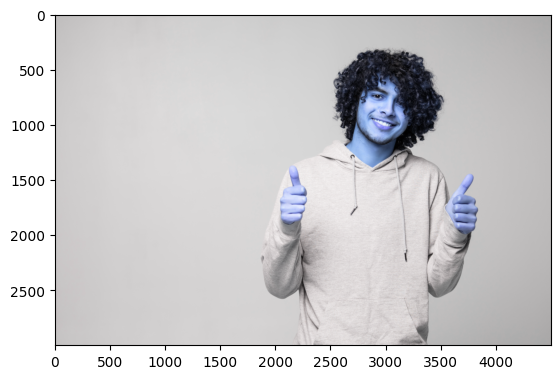

In [47]:
img = cv2.imread('happy_test.jpg')
plt.imshow(img)
plt.show()

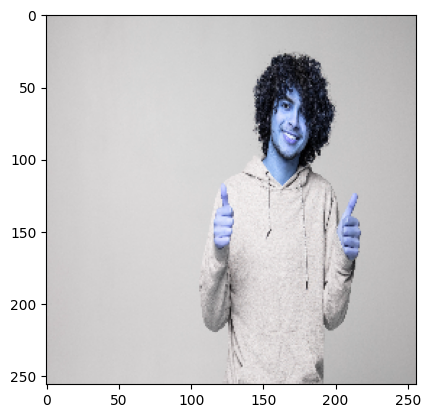

In [48]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.5972667]], dtype=float32)

In [50]:
if yhat > 0.6 : 
    print("predicted image is sad")
else :
    print("predicated image is happy")

predicated image is happy
